## **ID5059 Group project 2**  

### Setup of the Project


| Task List     | Team member names | Status     | Last editor |   Date |
| :---        |    :----:   |    :----:   |   :----:   |         ---: |
| Exploratory data      |   Meagan     | √    |  Meagan     | 11/03/24   |
| Imputation and balancing|   Laila & Meagan     | ×     |       | 18/03/24   |
|    |         |       |       |    |
|    |         |       |       |   |
| ...   | ...     |...     |...    | ...   |

**_For windows system_**

Ⅰ.Running rpy2 on Windows is currently not supported although relative success was recently reported with the lastest in the 3.3.x series. Hence version 3.3.3 is choosed here. 
  
Ⅱ. Preparation:  
(i) add **R_HOME** to System variables in computer environment variables, for me is 'D:\statistic tools for R\R\R-4.3.1'  
(ii) add **%R_HOME%\bin\x64** to **Path** in System variables  
  
Ⅲ.requirement:  
R>=3.5  
Python>=3.6  
  
**_For Mac or Linux system_**

Ⅰ. Preparation:   
(i) download the rpy2-3.3.x from ID5059 repository  
  
(ii) cd to rpy2-3.3.x's filefolder
  
(iii) use command or anaconda prompot command to execute **Python setup.py build install**
  
Ⅱ.requirement:  
R>=3.5  
Python>=3.6 

### Import Statements

In [5]:
!{sys.executable} -m pip install numpy pandas matplotlib scikit-learn seaborn imblearn rpy2==3.3.3  | grep -v "already satisfied"
import pandas as pd
import rpy2
import rpy2.robjects as ro
from rpy2.robjects import pandas2ri
from rpy2.robjects.conversion import localconverter
from rpy2.robjects.packages import importr
import rpy2.robjects as robjects

import sys

import os
import pandas as pd
import numpy as np
import matplotlib as mpl
mpl.rc('image', cmap='afmhot')
import seaborn as sns

%matplotlib notebook
import matplotlib.pyplot as plt

from skimage.feature import corner_peaks
from skimage.util import view_as_windows
from scipy.ndimage import minimum_filter, gaussian_filter

import skimage.io as skio

import ipywidgets as ipw

from IPython.display import HTML, display

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.impute import SimpleImputer
import sys

import pandas as pd
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns





/bin/bash: line 1: {sys.executable}: command not found


In [6]:
"""
     In lab(linux) and my windows, using pip directly it works,
     but for Mac, u might need try the above operation.
"""
!pip install rpy2==3.3.3

Defaulting to user installation because normal site-packages is not writeable
distutils: /home/pdk3/.local/lib/python3.9/site-packages
sysconfig: /home/pdk3/.local/lib64/python3.9/site-packages
user = True
home = None
root = None
prefix = None


In [7]:
os.chdir("/cs/home/pdk3/Documents/Semester2/ID5059/Coursework2/ID5059")
print(os.getcwd())

/cs/home/pdk3/Documents/Semester2/ID5059/Coursework2/ID5059


In [8]:

rpy2.__path__


"""
    using importr() to import R's package.
"""
base = importr('base')
utils = importr('utils')

sys.path.append("./data")
"""
    transform pandas.dataframe to R.dataframe by using localconverter()
    using train.csv as the example.
"""
pd.DataFrame.iteritems = pd.DataFrame.items
df = pd.read_csv("./data/train.csv")

with localconverter(ro.default_converter + pandas2ri.converter):
    df_R = ro.conversion.py2rpy(df)

'''
    OK, got the data 'df_R',
    For R code, surrounding them with 
        robjects.r(""" """)
    GOOD LUCK !
'''
robjects.globalenv['df_R'] = df_R
robjects.r(""" 
    head(df_R, 2)
""")
#df_R

id,N_Days,Drug,...,Prothrombin,Stage,Status
0,999,'D-penicillamine',...,9.700000,3.000000,'D'
1,"2,574",'Placebo',,11.000000,3.000000,'C'


# Data Visualisation: Meagan

In [9]:
"""
    Merge Meagan's R code here.
    Import train and test data firstly.
"""
df_train = pd.read_csv(r"C:\Users\jp341\Desktop\coursework recent\ID5059\ID5059GroupProject\data\train.csv")
df_test = pd.read_csv(r"C:\Users\jp341\Desktop\coursework recent\ID5059\ID5059GroupProject\data\test.csv")

#df_train = pd.read_csv("data/train.csv")
#df_test = pd.read_csv("data/test.csv")


with localconverter(ro.default_converter + pandas2ri.converter):
    cirr_train = ro.conversion.py2rpy(df_train)
    cirr_test = ro.conversion.py2rpy(df_test)

robjects.globalenv['cirr_train'] = cirr_train
robjects.globalenv['cirr_test'] = cirr_test
robjects.r(""" head(cirr_train, 2)""")

id,N_Days,Drug,...,Prothrombin,Stage,Status
0,999,'D-penicillamine',...,9.700000,3.000000,'D'
1,"2,574",'Placebo',,11.000000,3.000000,'C'


In [10]:
library_script = '''
#install.packages(c("tinytex", "rmarkdown", "tidyverse", "tidymodels", "ggcorrplot"))
library(tinytex)
library(rmarkdown)
library(tidyverse)
#library(tidymodels)
library(ggcorrplot)
'''
robjects.r(library_script)


R[write to console]: Error in library(rmarkdown) : there is no package called ‘rmarkdown’

R[write to console]: In addition: 
R[write to console]: Warning messages:

R[write to console]: 1: 
R[write to console]: In (function (package, help, pos = 2, lib.loc = NULL, character.only = FALSE,  :
R[write to console]: 
 
R[write to console]:  library ‘/usr/share/R/library’ contains no packages

R[write to console]: 2: 
R[write to console]: In (function (package, help, pos = 2, lib.loc = NULL, character.only = FALSE,  :
R[write to console]: 
 
R[write to console]:  library ‘/usr/share/R/library’ contains no packages



RRuntimeError: Error in library(rmarkdown) : there is no package called ‘rmarkdown’


In [ ]:
r_script = r'''
## 1. Organise the data

# Data found at 
#  https://www.kaggle.com/datasets/joebeachcapital/cirrhosis-patient-survival-prediction

# Visualising the train set
p <- ggplot() +
  geom_bar(aes(x = factor(cirr_train$Status), fill = "Train")) +
  labs(title = "Visualising the outcome", 
       x = "Status", 
       y = "Frequency")
p

# No of observations -
obs <- nrow(cirr_train)
obs

# Total no of features -
feat <- ncol(cirr_train)
feat

# Data cleaning #
# Examining data type
cirr_train %>% sapply(class) %>% as.data.frame

# Having analysed the additional detail on the columns/features provided on the 
# Kaggle site, we amend the column types as below -

# Changing to the correct column types
category_columns <- c("Drug", "Sex", "Ascites", "Hepatomegaly", "Spiders", 
                      "Edema", "Status", "Stage")

integer_columns <- c("N_Days","Age", "Cholesterol", "Copper", "Tryglicerides", 
                     "Platelets")
cont_columns <- c("Bilirubin", "Albumin", "Alk_Phos", "SGOT", "Prothrombin")

data <- cirr_train %>%
  replace(.=="null", NA) %>%
  mutate(across(all_of(category_columns), as.factor)) %>%
  mutate(across(all_of(integer_columns), as.integer))

# Check
data %>% sapply(class) %>% as.data.frame

# Missing values
missing_data_per_row <- rowSums(is.na(data))
print(missing_data_per_row[missing_data_per_row > 1])

# No row is missing more than 1 'feature' of data
# No need to drop any rows
# We need to manually remove values to perform imputation

data %>% mutate(across(colnames(data), is.na)) %>%
  summarise(across(colnames(data), sum))
# No missing values again

## 2. Data exploration

# Unique Identifier investigation
data %>% summarise_all(n_distinct)
# From this we see that 'id' is the only unique identifier and has exactly the same 
# number of unique values as the rows in the data

# Distributions
# factor - "Drug", "Sex", "Ascites", "Hepatomegaly", "Spiders", 
#                      "Edema", "Status", "Stage"

# continuous - "Bilirubin", "Albumin", "Alk_Phos", "SGOT", "Prothrombin"

# integer - "N_Days","Age", "Cholesterol", "Copper", "Tryglicerides", "Platelets"

# Categorical features
ggplot(data) + geom_bar(aes(x = Drug)) #Balanced
ggplot(data) + geom_bar(aes(x = Sex)) #Unbalanced
ggplot(data) + geom_bar(aes(x = Ascites)) #Unbalanced
ggplot(data) + geom_bar(aes(x = Hepatomegaly)) #Balanced
ggplot(data) + geom_bar(aes(x = Spiders)) #Unbalanced
ggplot(data) + geom_bar(aes(x = Edema)) #Unbalanced
ggplot(data) + geom_bar(aes(x = Stage)) #Unbalanced

# Continuous features
ggplot(data) + geom_histogram(aes(x = Bilirubin))
# long tail on right, peak at 1

ggplot(data) + geom_histogram(aes(x = Albumin))
# gaussian, mean around 3.7, longer left tail

ggplot(data) + geom_histogram(aes(x = Alk_Phos))
# long tail on right, peak at 1000

ggplot(data) + geom_histogram(aes(x = SGOT))
# long tail in right, outliers past 400

ggplot(data) + geom_histogram(aes(x = Platelets))
# gaussian, mean around 250, longer right tail

# Assessing information from order of data
ggplot(data) + geom_point(aes(x = 1:7905, y = N_Days))
# there is no discernible info on order here

ggplot(data) + geom_point(aes(x = 1:7905, y = Age))
# there is no discernible info on order here

ggplot(data) + geom_point(aes(x = 1:7905, y = Drug))
# there is no discernible info on order here

ggplot(data) + geom_point(aes(x = 1:7905, y = Stage))
# no patients in top 3 stages of disease, but no order info

# Relationships between response and attributes
pairs(~ Drug + Sex + Ascites + Hepatomegaly + Spiders + Edema + Stage, 
      data = data,
      main = "Training set of cirr data")

pairs(~ Bilirubin + Albumin + Alk_Phos + SGOT + Prothrombin, 
      data = data,
      main = "Training set of cirr data")

pairs(~ N_Days + Age + Cholesterol + Copper + Tryglicerides + Platelets, 
      data = data,
      main = "Training set of cirr data")


# factor - "Drug", "Sex", "Ascites", "Hepatomegaly", "Spiders", 
#                      "Edema", "Status", "Stage"

# continuous - "Bilirubin", "Albumin", "Alk_Phos", "SGOT", "Prothrombin"

# integer - "N_Days","Age", "Cholesterol", "Copper", "Tryglicerides", "Platelets"

# Continuous vs Continuous
ggplot(data) + geom_point(aes(x = Bilirubin, y = Albumin))
# Check from above pairs for more like this

# Continuous vs Outcome
ggplot(data) + geom_boxplot(aes(x = Bilirubin, y = Status))
# different means for all, lots of outliers 

ggplot(data) + geom_boxplot(aes(x = Albumin, y = Status))
# different means for all, similar for C and CL

ggplot(data) + geom_boxplot(aes(x = Alk_Phos, y = Status))
# different means for all, lots of outliers 

ggplot(data) + geom_boxplot(aes(x = SGOT, y = Status))
# different means for all, lots of outliers on right

ggplot(data) + geom_boxplot(aes(x = Prothrombin, y = Status))
# different means for all, lots of outliers on right

# Factor vs Factor
# factor - "Drug", "Sex", "Ascites", "Hepatomegaly", "Spiders", 
#                      "Edema", "Status", "Stage"


table(data$Drug, data$Sex)
# Only display two decimal places
options(digits=2)
prop.table(table(data$Drug, data$Sex)) * 100
# Less data for males

prop.table(table(data$Drug, data$Ascites)) * 100
# Not balanced

prop.table(table(data$Drug, data$Hepatomegaly)) * 100
# Balanced

prop.table(table(data$Drug, data$Spiders)) * 100
# Less data for Spiders = Y

prop.table(table(data$Drug, data$Edema)) * 100
# Less data for Edema = Y and S

prop.table(table(data$Drug, data$Stage)) * 100
# Unbalanced

# Perform similar for other features to check relations

# Correlations
# Continuous data
# Subset data
selected_columns_cont <- data[, c("Bilirubin", "Albumin", "Alk_Phos", "SGOT", "Prothrombin")]

# Compute the correlation matrix for the selected columns
correlation_matrix_cont <- cor(selected_columns_cont)

# Integer data
# Subset data
selected_columns_int <- data[, c("N_Days","Age", "Cholesterol", "Copper", "Tryglicerides", 
                             "Platelets")]

# Compute the correlation matrix for the selected columns
correlation_matrix_int <- cor(selected_columns_int)

# Look at interactions
'''
robjects.r(r_script)


# Data Imputation: Laila

D:\Anaconda\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
D:\Anaconda\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


In [2]:
root_folder = os.getcwd()
file_name = os.path.join(root_folder, "data/train.csv")

#train.csv - the training dataset; 
#Status is the categorical target; 
#C (censored) indicates the patient was alive at N_Days, 
#CL indicates the patient was alive at N_Days due to liver a transplant
#D indicates the patient was deceased at N_Days.

train = pd.read_csv(file_name)
train.drop(columns=["id"],inplace=True)
display(train)

,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,999,D-penicillamine,21532,M,N,N,N,N,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,394.0,9.7,3.0,D
1,2574,Placebo,19237,F,N,N,N,N,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,11.0,3.0,C
2,3428,Placebo,13727,F,N,Y,Y,Y,3.3,299.0,3.55,131.0,1029.0,119.35,50.0,199.0,11.7,4.0,D
3,2576,Placebo,18460,F,N,N,N,N,0.6,256.0,3.50,58.0,1653.0,71.30,96.0,269.0,10.7,3.0,C
4,788,Placebo,16658,F,N,Y,N,N,1.1,346.0,3.65,63.0,1181.0,125.55,96.0,298.0,10.6,4.0,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7900,1166,D-penicillamine,16839,F,N,N,N,N,0.8,309.0,3.56,38.0,1629.0,79.05,224.0,344.0,9.9,2.0,C
7901,1492,Placebo,17031,F,N,Y,N,N,0.9,260.0,3.43,62.0,1440.0,142.00,78.0,277.0,10.0,4.0,C
7902,1576,D-penicillamine,25873,F,N,N,Y,S,2.0,225.0,3.19,51.0,933.0,69.75,62.0,200.0,12.7,2.0,D
7903,3584,D-penicillamine,22960,M,N,Y,N,N,0.7,248.0,2.75,32.0,1003.0,57.35,118.0,221.0,10.6,4.0,D


In [ ]:


# Your HTML table content
html_table = """<table>
  <tr>
    <th>Variable</th>
    <th>Description</th>
  </tr>
  <tr>
    <td>id</td>
    <td>A unique identifier for each patient.</td>
  </tr>
  <tr>
    <td>N_Days</td>
    <td>Number of days elapsed from a reference point.</td>
  </tr>
  <tr>
    <td>Drug</td>
    <td>The type of medication administered or used in treatment.</td>
  </tr>
  <tr>
    <td>Age</td>
    <td>The age of the patient in years.</td>
  </tr>
  <tr>
    <td>Sex</td>
    <td>The gender of the patient.</td>
  </tr>
   <tr>
    <td>Ascites</td>
    <td>Presence or absence of ascites, an abnormal accumulation of fluid in the abdominal cavity.</td>
  </tr>
   <tr>
    <td>Hepatomegaly</td>
    <td>Indicates whether there is hepatomegaly, which is the enlargement of the liver.</td>
  </tr>
   <tr>
    <td>Spiders</td>
    <td>Presence or absence of "spiders" (vascular lesions), which are skin lesions associated with liver diseases.</td>
  </tr>
   <tr>
    <td>Edema</td>
    <td>Presence or absence of edema, the accumulation of fluid in tissues.</td>
  </tr>
   <tr>
    <td>Bilirubin</td>
    <td>Levels of bilirubin in the blood.</td>
  </tr>
   <tr>
    <td>Cholesterol</td>
    <td>Levels of cholesterol in the blood.</td>
  </tr>
   <tr>
    <td>Albumin</td>
    <td>Levels of albumin in the blood.</td>
  </tr>
   <tr>
    <td>Copper</td>
    <td>Levels of copper in the body.</td>
  </tr>
   <tr>
    <td>Alk_Phos</td>
    <td>Levels of alkaline phosphatase in the blood.</td>
  </tr>
   <tr>
    <td>SGOT</td>
    <td>Levels of the enzyme aspartate aminotransferase (SGOT or AST) in the blood, an indicator of liver damage.</td>
  </tr>
   <tr>
    <td>Tryglicerides</td>
    <td>Levels of triglycerides in the blood.</td>
  </tr>
   <tr>
    <td>Platelets</td>
    <td>Quantity of platelets in the blood.</td>
  </tr>
   <tr>
    <td>Prothrombin</td>
    <td>Prothrombin time.</td>
  </tr>
  <tr>
    <td>Stage</td>
    <td>The stage of the disease or medical condition of the patient.</td>
  </tr>
  <tr>
    <td>Status</td>
    <td>The status of the patient, with values 'C' (Compensated), 'D' (Decompensated), or 'CL' (Controlled)..</td>
  </tr>
</table>
"""
display(HTML(html_table))

In [3]:
table_data = [
    {"Variable": "id", "Description": "A unique identifier for each patient."},
    {"Variable": "N_Days", "Description": "Number of days elapsed from a reference point."},
    {"Variable": "Drug", "Description": "The type of medication administered or used in treatment."},
    {"Variable": "Age", "Description": "The age of the patient in years."},
    {"Variable": "Sex", "Description": "The gender of the patient."},
    {"Variable": "Ascites", "Description": "Presence or absence of ascites, an abnormal accumulation of fluid in the abdominal cavity."},
    {"Variable": "Hepatomegaly", "Description": "Indicates whether there is hepatomegaly, which is the enlargement of the liver."},
    {"Variable": "Spiders", "Description": "Presence or absence of 'spiders' (vascular lesions), which are skin lesions associated with liver diseases."},
    {"Variable": "Edema", "Description": "Presence or absence of edema, the accumulation of fluid in tissues."},
    {"Variable": "Bilirubin", "Description": "Levels of bilirubin in the blood."},
    {"Variable": "Cholesterol", "Description": "Levels of cholesterol in the blood."},
    {"Variable": "Albumin", "Description": "Levels of albumin in the blood."},
    {"Variable": "Copper", "Description": "Levels of copper in the body."},
    {"Variable": "Alk_Phos", "Description": "Levels of alkaline phosphatase in the blood."},
    {"Variable": "SGOT", "Description": "Levels of the enzyme aspartate aminotransferase (SGOT or AST) in the blood, an indicator of liver damage."},
    {"Variable": "Tryglicerides", "Description": "Levels of triglycerides in the blood."},
    {"Variable": "Platelets", "Description": "Quantity of platelets in the blood."},
    {"Variable": "Prothrombin", "Description": "Prothrombin time."},
    {"Variable": "Stage", "Description": "The stage of the disease or medical condition of the patient."},
    {"Variable": "Status", "Description": "The status of the patient, with values 'C' (Compensated), 'D' (Decompensated), or 'CL' (Controlled)."}
]

table_df = pd.DataFrame(table_data)
display(table_df)

,Variable,Description
0,id,A unique identifier for each patient.
1,N_Days,Number of days elapsed from a reference point.
2,Drug,The type of medication administered or used in...
3,Age,The age of the patient in years.
4,Sex,The gender of the patient.
5,Ascites,"Presence or absence of ascites, an abnormal ac..."
6,Hepatomegaly,"Indicates whether there is hepatomegaly, which..."
7,Spiders,Presence or absence of 'spiders' (vascular les...
8,Edema,"Presence or absence of edema, the accumulation..."
9,Bilirubin,Levels of bilirubin in the blood.


Imputations

In [4]:
train_copy = train.copy()

np.random.seed(41) #random selections will be the same every time

for column in train_copy.columns:
    n_missing_values = np.random.randint(1, int(train_copy[column].size * 0.1))  # Randomly choose between 1% to 10% missing values
    random_indices = np.random.choice(train_copy.index, size=n_missing_values, replace=False)
    train_copy.loc[random_indices, column] = np.nan

train_copy

,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,999.0,D-penicillamine,21532.0,NaN,N,N,N,N,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,394.0,9.7,3.0,D
1,2574.0,Placebo,19237.0,F,N,N,N,N,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,11.0,3.0,C
2,3428.0,Placebo,13727.0,F,N,Y,Y,Y,3.3,299.0,3.55,131.0,1029.0,119.35,50.0,199.0,11.7,4.0,D
3,2576.0,Placebo,NaN,F,N,N,N,N,0.6,256.0,3.50,58.0,1653.0,71.30,96.0,269.0,10.7,3.0,C
4,788.0,Placebo,16658.0,F,N,Y,N,N,1.1,346.0,3.65,63.0,1181.0,125.55,96.0,298.0,10.6,4.0,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7900,1166.0,D-penicillamine,16839.0,F,N,N,N,N,0.8,309.0,3.56,38.0,1629.0,79.05,224.0,344.0,9.9,2.0,C
7901,1492.0,Placebo,17031.0,F,N,Y,N,N,0.9,260.0,3.43,NaN,1440.0,142.00,78.0,277.0,10.0,4.0,C
7902,1576.0,D-penicillamine,25873.0,F,N,N,Y,S,2.0,225.0,3.19,51.0,933.0,69.75,62.0,200.0,12.7,2.0,D
7903,3584.0,D-penicillamine,22960.0,M,N,Y,N,N,0.7,248.0,2.75,32.0,1003.0,57.35,NaN,221.0,10.6,4.0,D


In [5]:
train_copy.isna().sum()

N_Days            81
Drug             522
Age              494
Sex              674
Ascites          198
Hepatomegaly     553
Spiders          752
Edema            624
Bilirubin        669
Cholesterol      260
Albumin          107
Copper           781
Alk_Phos          54
SGOT             466
Tryglicerides    614
Platelets        138
Prothrombin        5
Stage             51
Status           108
dtype: int64

In [ ]:


# Your HTML table content
html_table = """<table>
  <tr>
    <th>Type</th>
    <th>Method</th>
  </tr>
  <tr>
    <td>Missing Completely At Random</td>
    <td>Mean, Median, Mode</td>
  </tr>
  <tr>
    <td>Missing At Random</td>
    <td>Multiple imputation, Regression imputation</td>
  </tr>
  <tr>
    <td>Missing Not At Random</td>
    <td>TPattern Substitution, Maximum Likelihood estimation</td>
  </tr>
</table>
"""
display(HTML(html_table))

In [6]:


numeric_cols = train_copy.select_dtypes(include=['number']).columns
non_numeric_cols = train_copy.select_dtypes(exclude=['number']).columns

imputer_mean = SimpleImputer(strategy='mean')
imputer_median = SimpleImputer(strategy='median')
imputer_most_frequent = SimpleImputer(strategy='most_frequent')

train_imputed_mean = pd.DataFrame(imputer_mean.fit_transform(train_copy[numeric_cols]), columns=numeric_cols)
train_imputed_median = pd.DataFrame(imputer_median.fit_transform(train_copy[numeric_cols]), columns=numeric_cols)
train_imputed_most_frequent = pd.DataFrame(imputer_most_frequent.fit_transform(train_copy[numeric_cols]), columns=numeric_cols)

for col in non_numeric_cols:
    most_frequent_value = train_copy[col].mode()[0]
    train_imputed_mean[col] = train_copy[col].fillna(most_frequent_value)
    train_imputed_median[col] = train_copy[col].fillna(most_frequent_value)
    train_imputed_most_frequent[col] = train_copy[col].fillna(most_frequent_value)

In [7]:
print("Imputed DataFrames using Mean strategy:")
display(train_imputed_mean)

Imputed DataFrames using Mean strategy:


,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Drug,Sex,Ascites,Hepatomegaly,Spiders,Edema,Status
0,999.0,21532.000000,2.3,316.0,3.35,172.00000,1601.0,179.80,63.000000,394.0,9.7,3.0,D-penicillamine,F,N,N,N,N,D
1,2574.0,19237.000000,0.9,364.0,3.54,63.00000,1440.0,134.85,88.000000,361.0,11.0,3.0,Placebo,F,N,N,N,N,C
2,3428.0,13727.000000,3.3,299.0,3.55,131.00000,1029.0,119.35,50.000000,199.0,11.7,4.0,Placebo,F,N,Y,Y,Y,D
3,2576.0,18367.700445,0.6,256.0,3.50,58.00000,1653.0,71.30,96.000000,269.0,10.7,3.0,Placebo,F,N,N,N,N,C
4,788.0,16658.000000,1.1,346.0,3.65,63.00000,1181.0,125.55,96.000000,298.0,10.6,4.0,Placebo,F,N,Y,N,N,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7900,1166.0,16839.000000,0.8,309.0,3.56,38.00000,1629.0,79.05,224.000000,344.0,9.9,2.0,D-penicillamine,F,N,N,N,N,C
7901,1492.0,17031.000000,0.9,260.0,3.43,84.56457,1440.0,142.00,78.000000,277.0,10.0,4.0,Placebo,F,N,Y,N,N,C
7902,1576.0,25873.000000,2.0,225.0,3.19,51.00000,933.0,69.75,62.000000,200.0,12.7,2.0,D-penicillamine,F,N,N,Y,S,D
7903,3584.0,22960.000000,0.7,248.0,2.75,32.00000,1003.0,57.35,115.238788,221.0,10.6,4.0,D-penicillamine,M,N,Y,N,N,D


In [ ]:
print("Imputed DataFrames using Median strategy:")
display(train_imputed_median)

In [ ]:
print("Imputed DataFrames using Most Frequent strategy:")
display(train_imputed_most_frequent)

<IPython.core.display.Javascript object>


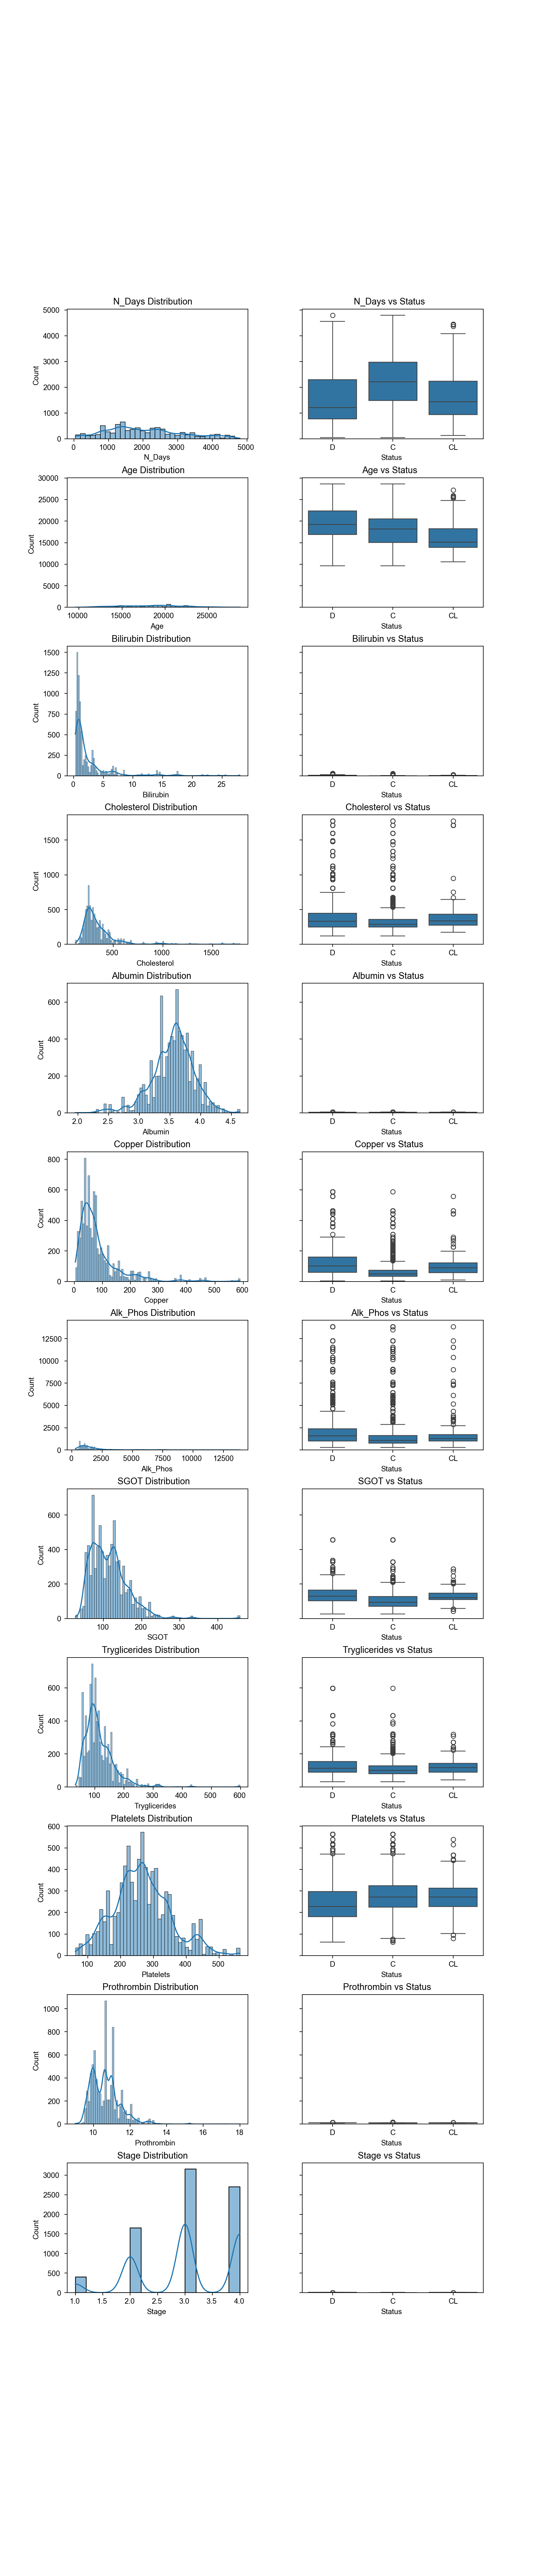

In [8]:


numerical_cols = []
for col in train.columns:
    if train[col].dtype != 'O' and train[col].nunique() > 2 and col != 'Status':
        numerical_cols.append(col)
        
n_rows = len(numerical_cols)
fig, axs = plt.subplots(n_rows, 2, figsize=(10, 4 * n_rows), sharey='row', gridspec_kw={'hspace': 0.3, 'wspace': 0.3})
sns.set_palette([(0.8, 0.56, 0.65), 'crimson',  (0.99, 0.8, 0.3)])
for i, col in enumerate(numerical_cols):
    sns.histplot(train[col], ax=axs[i, 0], kde=True)
    axs[i, 0].set_title(f'{col} Distribution')

for i, col in enumerate(numerical_cols):
    sns.boxplot(x=train['Status'], y=train[col], ax=axs[i, 1])
    axs[i, 1].set_title(f'{col} vs Status')

plt.show()


# Data Balancing: Zhiqi

  check col's type

In [7]:
#imputed_data = imputed_data_mean.copy()
original_data = pd.read_csv("data/train.csv")
original_data.dtypes

id                 int64
N_Days             int64
Drug              object
Age                int64
Sex               object
Ascites           object
Hepatomegaly      object
Spiders           object
Edema             object
Bilirubin        float64
Cholesterol      float64
Albumin          float64
Copper           float64
Alk_Phos         float64
SGOT             float64
Tryglicerides    float64
Platelets        float64
Prothrombin      float64
Stage            float64
Status            object
dtype: object

"\n     lets check the train_imputed_mean's unbalanced cols here\n     maybe be duplicated with Meagan's part u can delete it at last\n     Unbalanced Results: \n                         Sex(F/M:92/8), Ascites(N/Y:95/5), Spiders(N/Y:75/25), \n                                Edema(90/5/5:N/S/Y), Status(C/D/CL:62/33/5)  ——object\n                         \n                         Bilirubin, cholesterol, copper, Alk_Phos, SGOT(slight) —— right skewed float64\n                         \n                         Stage(slight) —— left skewed float64\n"

/tmp/ipykernel_3156640/1006180965.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, palette='Set2')
/tmp/ipykernel_3156640/1006180965.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, palette='Set2')
/tmp/ipykernel_3156640/1006180965.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, palette='Set2')
/tmp/ipykernel_3156640/1006180965.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue`

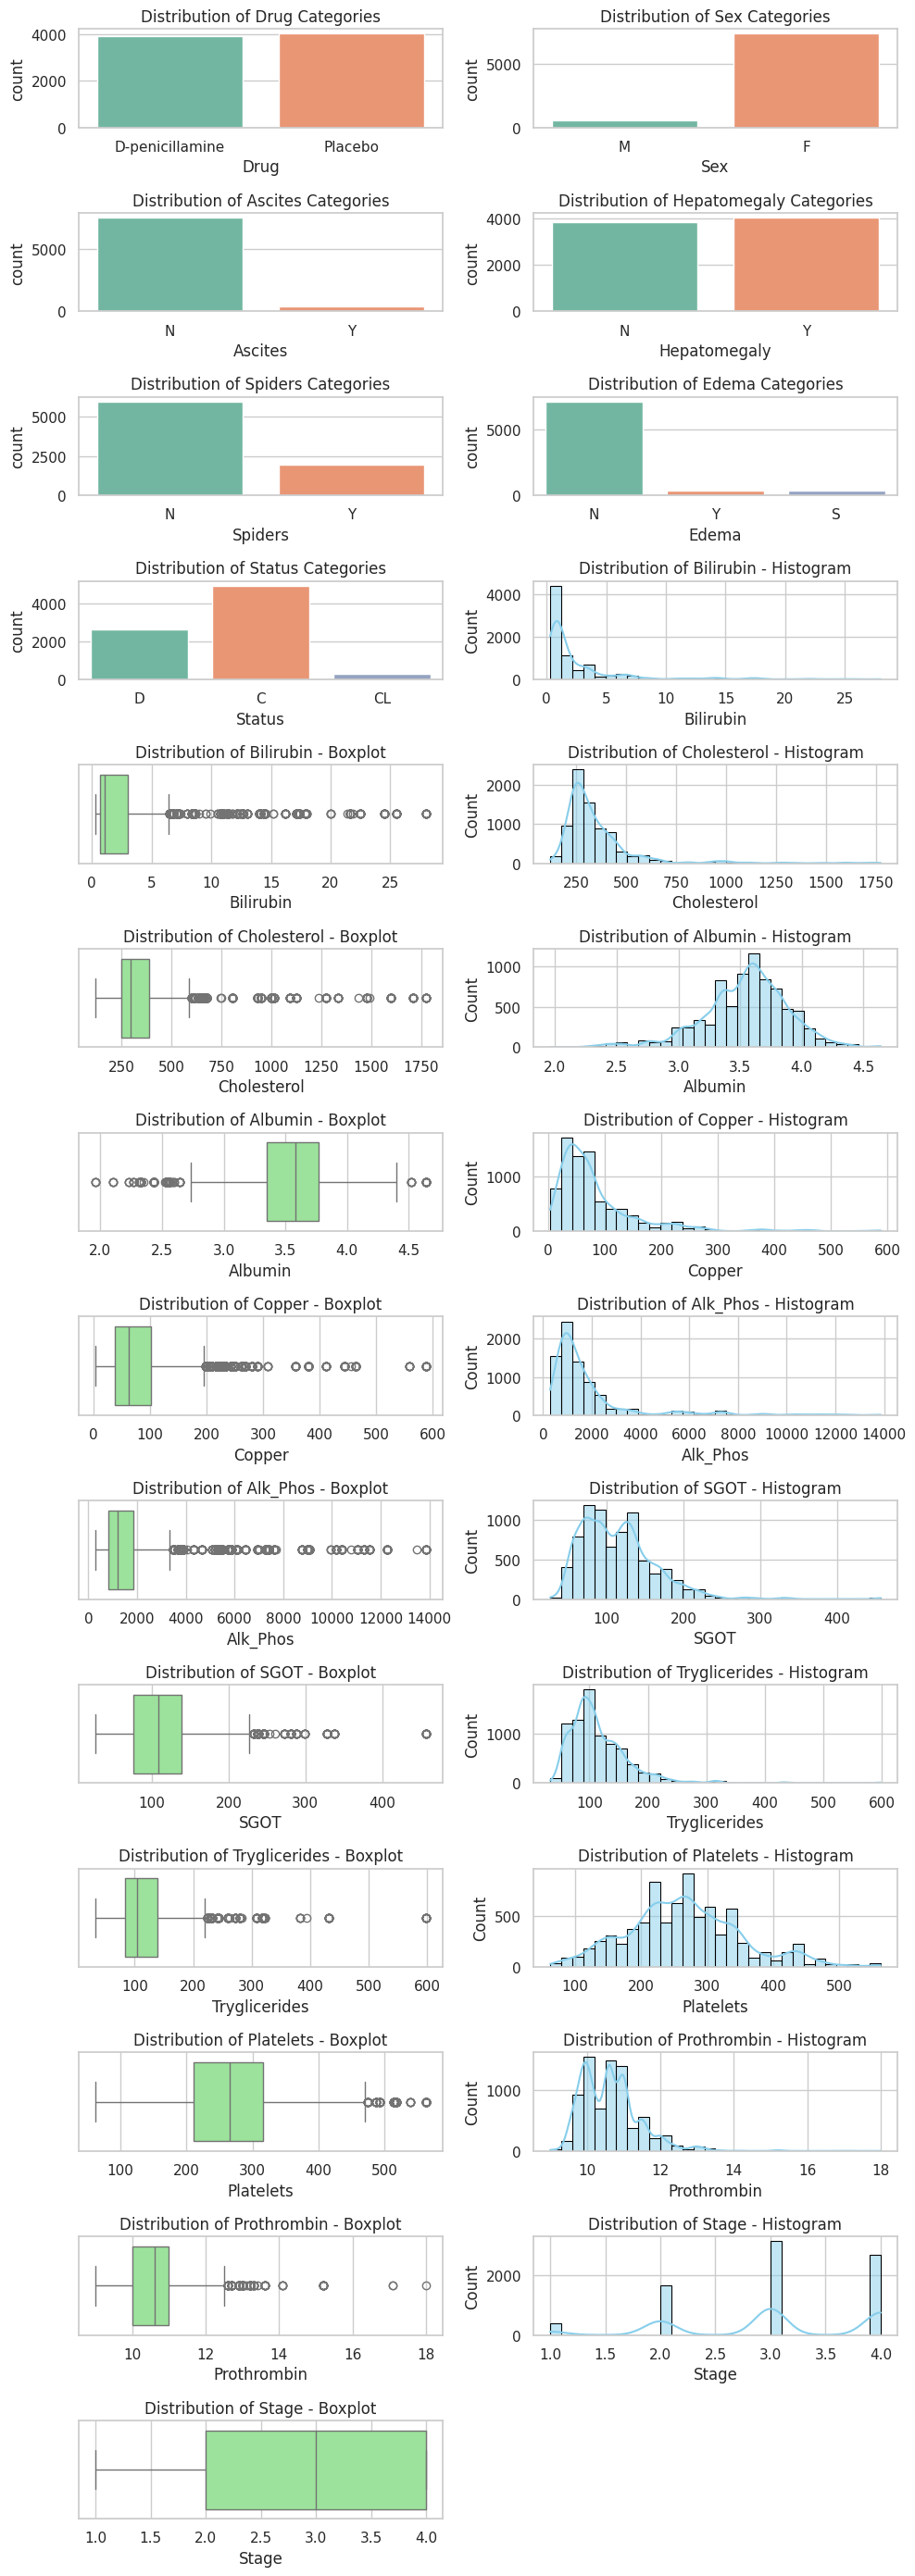

In [9]:
def visualise_distribution(data):
    
    sns.set(style="whitegrid")

    categorical_columns = [col for col in data.columns 
                if (data[col].dtype == 'object') or (data[col].dtype == 'bool')]
    float_columns = [col for col in data.columns if data[col].dtype == 'float64']

    total_plots = len(categorical_columns) + 2 * len(float_columns)

    n_rows = (total_plots + 1) // 2

    plt.figure(figsize=(10, 2 * n_rows))

    for i, col in enumerate(categorical_columns, 1):
        plt.subplot(n_rows, 2, i)
        sns.countplot(x=col, data=data, palette='Set2')
        plt.title(f'Distribution of {col} Categories')

    for j, col in enumerate(float_columns, 1):
        index = len(categorical_columns) + 2 * j - 1  

        plt.subplot(n_rows, 2, index)
        sns.histplot(data[col], kde=True, color='skyblue', bins=30, edgecolor='black')
        plt.title(f'Distribution of {col} - Histogram')

        plt.subplot(n_rows, 2, index + 1)
        sns.boxplot(x=data[col], color='lightgreen')
        plt.title(f'Distribution of {col} - Boxplot')

    plt.tight_layout()
    plt.show()
visualise_distribution(original_data)

In [11]:

"""
    Balancing predictor column 'Status'
    log handles the severely right-skewed four-column explanatory variables of 
        'Bilirubin', 'Cholesterol', 'Copper', and 'Alk_Phos'
        
    PS: (if u met Nonetype cannot split problems, 
        uninstall threadpoolctl and then pip install threadpoolctl==3.1.0)
"""

X_original = original_data.drop('Status', axis=1)
y_original = original_data['Status']

# Log processing of numerical variables can alleviate the right skew problem
epsilon = 1e-6
log_transform_vars = ['Bilirubin', 'Cholesterol', 'Copper', 'Alk_Phos']
for var in log_transform_vars:
    X_original[var] = np.log(X_original[var] + epsilon)

# Perform one hot encoder hot encoding c processing on the explanatory variables
X_original_encoded = pd.get_dummies(X_original)

# Convert categorical target variable to numeric value
label_encoder = LabelEncoder()
y_original_encoded = label_encoder.fit_transform(y_original)

### SMOTE

#### explain briefly what SMOTE does to create the balance

In [12]:

smote = SMOTE(random_state=42)
X_resampled_smote, y_resampled_smote = smote.fit_resample(X_original_encoded, y_original_encoded)
y_resampled_labels_smote = label_encoder.inverse_transform(y_resampled_smote)

X_resampled_smote = pd.DataFrame(X_resampled_smote, columns= X_original_encoded.columns)
y_resampled_smote = pd.DataFrame(y_resampled_labels_smote, columns=['Status'])

train_balanced_smote = pd.concat([X_resampled_smote, y_resampled_smote], axis=1)
train_balanced_smote = train_balanced_smote.dropna()

### ADASYN

ADASYN (Adaptive Synthetic Sampling): 
 * but takes into account the density of the sample distribution when 
 * generating synthetic samples. This means that for minority class samples
 * in boundary areas. Hence it will generate more synthetic samples.e

In [13]:
adasyn = ADASYN(random_state=42)
X_resampled_adasyn, y_resampled_adasyn = adasyn.fit_resample(X_original_encoded, y_original_encoded)
y_resampled_labels_adasyn = label_encoder.inverse_transform(y_resampled_adasyn)

X_resampled_adasyn = pd.DataFrame(X_resampled_adasyn, columns=X_original_encoded.columns)
y_resampled_adasyn = pd.DataFrame(y_resampled_labels_adasyn, columns=['Status'])


train_balanced_adasyn = pd.concat([X_resampled_adasyn, y_resampled_adasyn], axis=1)
train_balanced_adasyn = train_balanced_adasyn.dropna()

### Function to sample the data for the model

In [14]:
def balance_adasyn(X,y):
    adasyn = ADASYN(random_state=42)
    X_train, y_train = adasyn.fit_resample(X,y)

    return X_train,y_train

In [15]:
def balance_smote(X,y):
    smote = SMOTE(random_state=42)
    X_train, y_train = smote.fit_resample(X,y)

    return X_train,y_train

    Check the class distribution after oversampling

Class distribution after resampling: Counter({'CL': 4984, 'C': 4965, 'D': 4809})
id                        int64
N_Days                    int64
Age                       int64
Bilirubin               float64
Cholesterol             float64
Albumin                 float64
Copper                  float64
Alk_Phos                float64
SGOT                    float64
Tryglicerides           float64
Platelets               float64
Prothrombin             float64
Stage                   float64
Drug_D-penicillamine       bool
Drug_Placebo               bool
Sex_F                      bool
Sex_M                      bool
Ascites_N                  bool
Ascites_Y                  bool
Hepatomegaly_N             bool
Hepatomegaly_Y             bool
Spiders_N                  bool
Spiders_Y                  bool
Edema_N                    bool
Edema_S                    bool
Edema_Y                    bool
Status                   object
dtype: object


,id,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,...,Ascites_N,Ascites_Y,Hepatomegaly_N,Hepatomegaly_Y,Spiders_N,Spiders_Y,Edema_N,Edema_S,Edema_Y,Status
0,0,999,21532,0.832910,5.755742,3.350000,5.147494,7.378384,179.800000,63.000000,...,True,False,True,False,True,False,True,False,False,D
1,1,2574,19237,-0.105359,5.897154,3.540000,4.143135,7.272398,134.850000,88.000000,...,True,False,True,False,True,False,True,False,False,C
2,2,3428,13727,1.193923,5.700444,3.550000,4.875197,6.936343,119.350000,50.000000,...,True,False,False,True,False,True,False,False,True,D
3,3,2576,18460,-0.510824,5.545177,3.500000,4.060443,7.410347,71.300000,96.000000,...,True,False,True,False,True,False,True,False,False,C
4,4,788,16658,0.095311,5.846439,3.650000,4.143135,7.074117,125.550000,96.000000,...,True,False,False,True,True,False,True,False,False,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14753,7829,1322,12572,0.931433,6.062240,3.589729,4.702568,7.024287,137.520989,77.413278,...,True,False,False,True,True,False,True,False,False,D
14754,7852,1329,12909,0.975990,6.205997,3.479832,4.399457,7.232947,139.816972,132.576709,...,True,False,False,True,True,False,True,False,False,D
14755,7323,1256,24765,-0.029325,6.193222,3.246130,4.467016,7.482631,145.227770,139.078685,...,True,False,True,True,True,False,True,False,False,D
14756,7831,1512,25823,0.573249,5.559830,3.266578,3.968247,6.972308,74.637501,68.006146,...,True,False,True,True,True,True,True,True,False,D


/tmp/ipykernel_3156640/1006180965.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, palette='Set2')
/tmp/ipykernel_3156640/1006180965.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, palette='Set2')
/tmp/ipykernel_3156640/1006180965.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, palette='Set2')
/tmp/ipykernel_3156640/1006180965.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue`

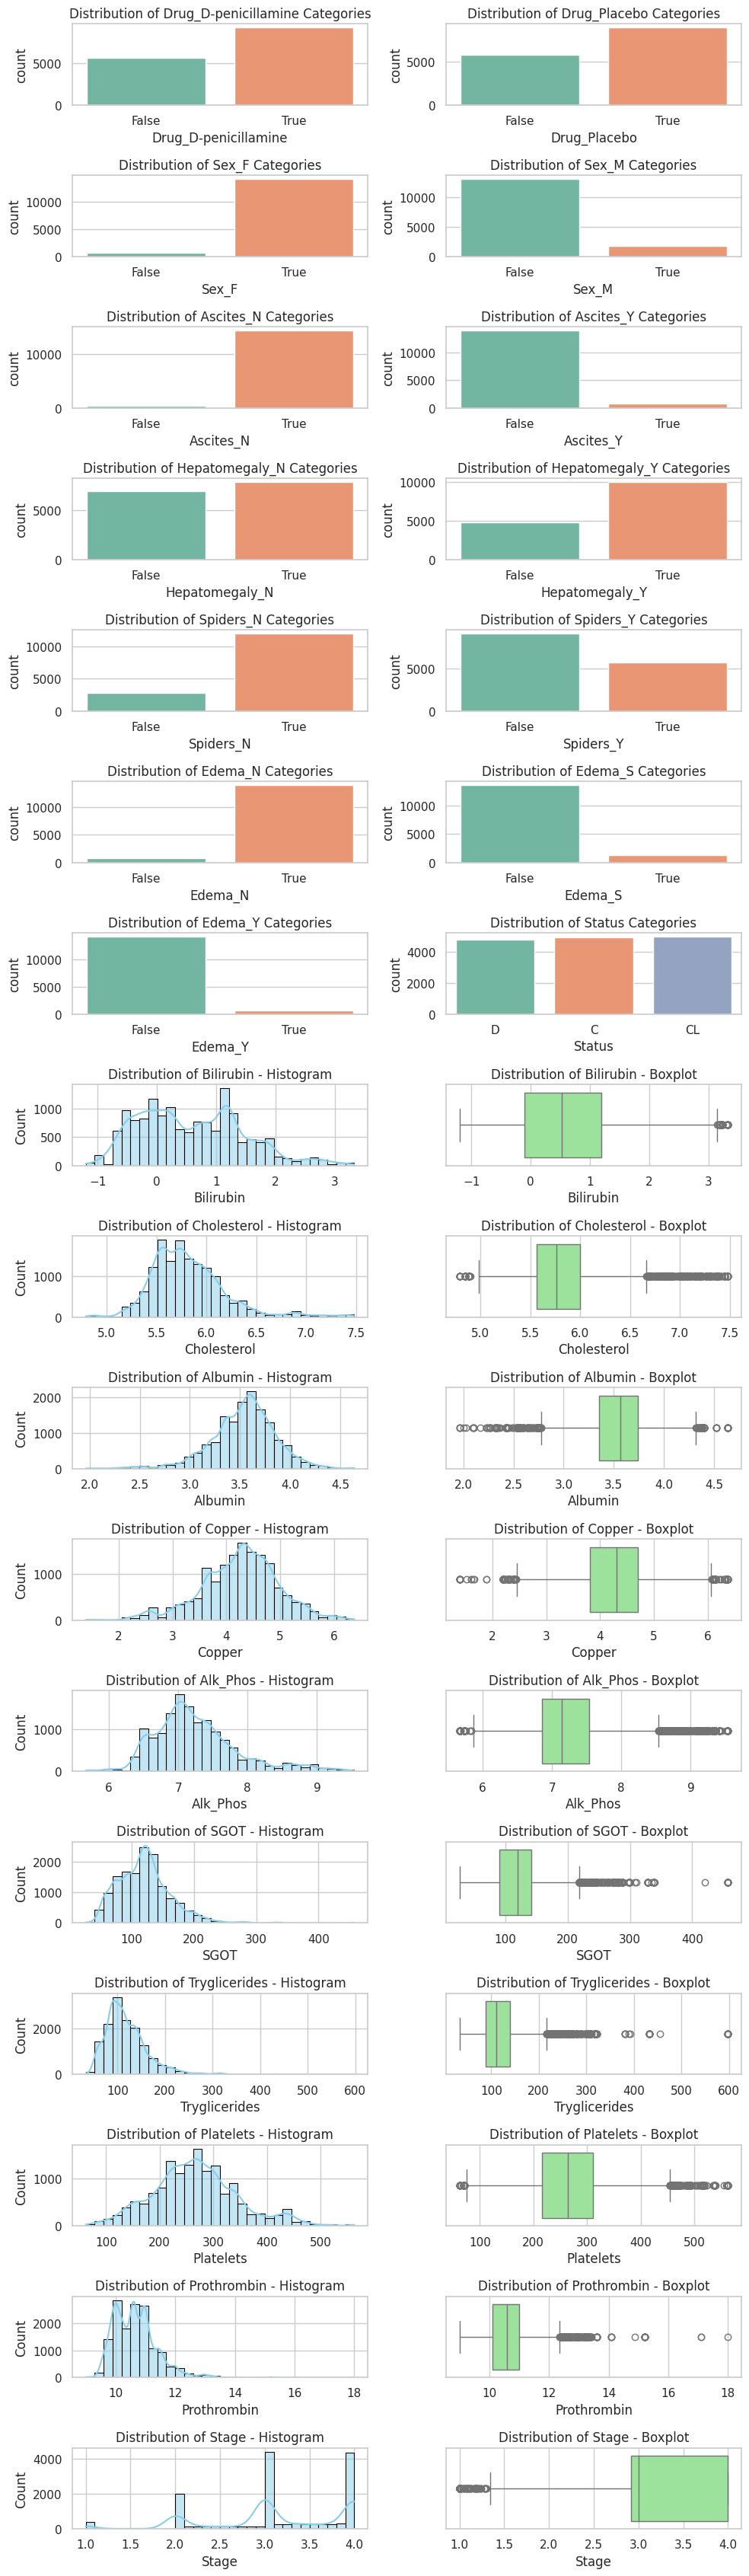

In [14]:
from collections import Counter

print('Class distribution after resampling:', Counter(y_resampled_labels_adasyn))
print(train_balanced_adasyn.dtypes)
display(train_balanced_adasyn)
visualise_distribution(train_balanced_adasyn)


Class distribution after resampling: Counter({'D': 4965, 'C': 4965, 'CL': 4965})
id                        int64
N_Days                    int64
Age                       int64
Bilirubin               float64
Cholesterol             float64
Albumin                 float64
Copper                  float64
Alk_Phos                float64
SGOT                    float64
Tryglicerides           float64
Platelets               float64
Prothrombin             float64
Stage                   float64
Drug_D-penicillamine       bool
Drug_Placebo               bool
Sex_F                      bool
Sex_M                      bool
Ascites_N                  bool
Ascites_Y                  bool
Hepatomegaly_N             bool
Hepatomegaly_Y             bool
Spiders_N                  bool
Spiders_Y                  bool
Edema_N                    bool
Edema_S                    bool
Edema_Y                    bool
Status                   object
dtype: object


,id,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,...,Ascites_N,Ascites_Y,Hepatomegaly_N,Hepatomegaly_Y,Spiders_N,Spiders_Y,Edema_N,Edema_S,Edema_Y,Status
0,0,999,21532,0.832910,5.755742,3.350000,5.147494,7.378384,179.800000,63.000000,...,True,False,True,False,True,False,True,False,False,D
1,1,2574,19237,-0.105359,5.897154,3.540000,4.143135,7.272398,134.850000,88.000000,...,True,False,True,False,True,False,True,False,False,C
2,2,3428,13727,1.193923,5.700444,3.550000,4.875197,6.936343,119.350000,50.000000,...,True,False,False,True,False,True,False,False,True,D
3,3,2576,18460,-0.510824,5.545177,3.500000,4.060443,7.410347,71.300000,96.000000,...,True,False,True,False,True,False,True,False,False,C
4,4,788,16658,0.095311,5.846439,3.650000,4.143135,7.074117,125.550000,96.000000,...,True,False,False,True,True,False,True,False,False,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14890,2046,203,21331,1.162723,5.773460,3.428737,4.137945,6.861651,94.712000,101.480001,...,True,True,False,True,False,True,True,False,True,D
14891,6655,1486,18614,1.052372,5.585663,3.849060,4.345913,7.273779,98.173174,152.817264,...,True,False,False,True,True,True,True,False,False,D
14892,7227,626,20293,2.297562,6.303121,3.700000,4.760824,7.903020,140.682780,121.547718,...,True,False,False,True,True,True,True,False,True,D
14893,6115,1452,17787,0.239987,5.398274,3.769767,4.218847,7.028956,156.768624,72.886185,...,True,False,True,True,True,False,True,False,False,D


/tmp/ipykernel_3156640/1006180965.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, palette='Set2')
/tmp/ipykernel_3156640/1006180965.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, palette='Set2')
/tmp/ipykernel_3156640/1006180965.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, palette='Set2')
/tmp/ipykernel_3156640/1006180965.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue`

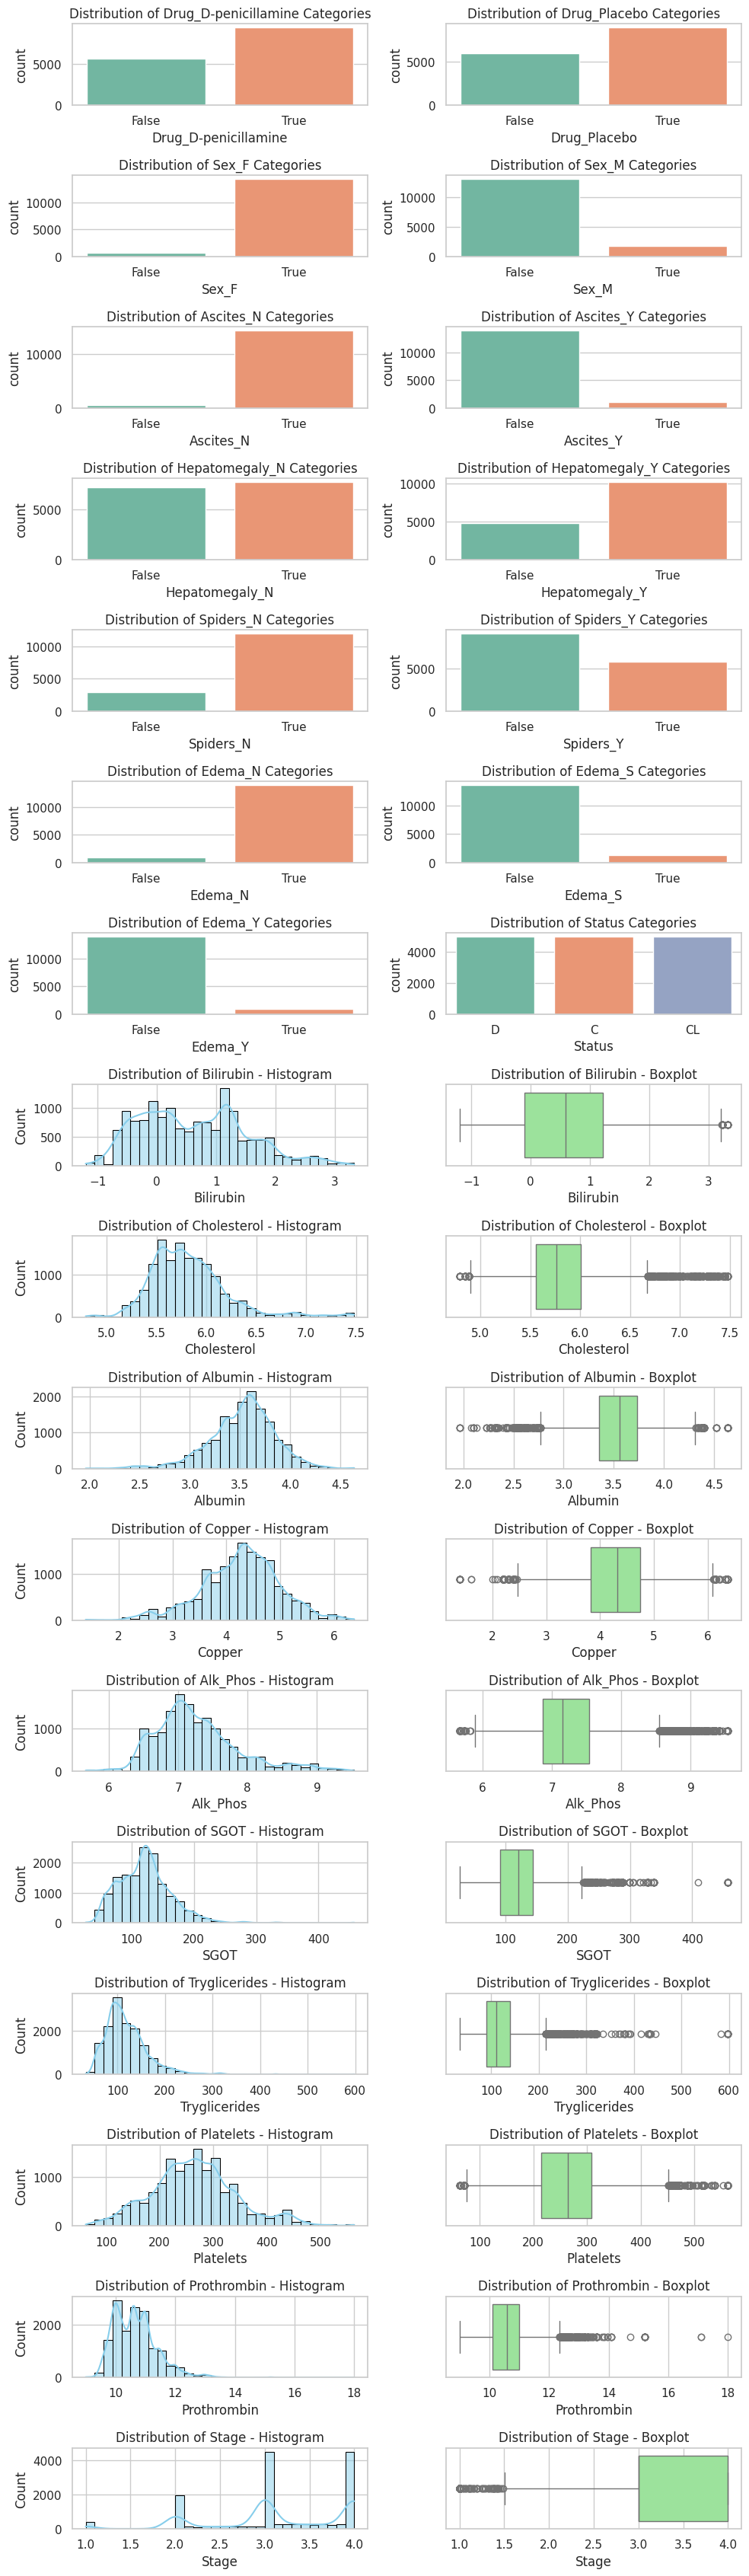

In [15]:

print('Class distribution after resampling:', Counter(y_resampled_labels_smote))
print(train_balanced_smote.dtypes)
display(train_balanced_smote)
visualise_distribution(train_balanced_smote)

# Feature engineering: Zhiqi

    I converted the bool column in train_imputed_balanced to int for similarity calculation.
    If you need bool type, you can copy train_imputed_balanced at the end of part A.

In [16]:
encoded_smote = train_balanced_smote * 1

display(encoded_smote)
print(encoded_smote.dtypes)

,id,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,...,Ascites_N,Ascites_Y,Hepatomegaly_N,Hepatomegaly_Y,Spiders_N,Spiders_Y,Edema_N,Edema_S,Edema_Y,Status
0,0,999,21532,0.832910,5.755742,3.350000,5.147494,7.378384,179.800000,63.000000,...,1,0,1,0,1,0,1,0,0,D
1,1,2574,19237,-0.105359,5.897154,3.540000,4.143135,7.272398,134.850000,88.000000,...,1,0,1,0,1,0,1,0,0,C
2,2,3428,13727,1.193923,5.700444,3.550000,4.875197,6.936343,119.350000,50.000000,...,1,0,0,1,0,1,0,0,1,D
3,3,2576,18460,-0.510824,5.545177,3.500000,4.060443,7.410347,71.300000,96.000000,...,1,0,1,0,1,0,1,0,0,C
4,4,788,16658,0.095311,5.846439,3.650000,4.143135,7.074117,125.550000,96.000000,...,1,0,0,1,1,0,1,0,0,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14890,2046,203,21331,1.162723,5.773460,3.428737,4.137945,6.861651,94.712000,101.480001,...,1,1,0,1,0,1,1,0,1,D
14891,6655,1486,18614,1.052372,5.585663,3.849060,4.345913,7.273779,98.173174,152.817264,...,1,0,0,1,1,1,1,0,0,D
14892,7227,626,20293,2.297562,6.303121,3.700000,4.760824,7.903020,140.682780,121.547718,...,1,0,0,1,1,1,1,0,1,D
14893,6115,1452,17787,0.239987,5.398274,3.769767,4.218847,7.028956,156.768624,72.886185,...,1,0,1,1,1,0,1,0,0,D


id                        int64
N_Days                    int64
Age                       int64
Bilirubin               float64
Cholesterol             float64
Albumin                 float64
Copper                  float64
Alk_Phos                float64
SGOT                    float64
Tryglicerides           float64
Platelets               float64
Prothrombin             float64
Stage                   float64
Drug_D-penicillamine      int64
Drug_Placebo              int64
Sex_F                     int64
Sex_M                     int64
Ascites_N                 int64
Ascites_Y                 int64
Hepatomegaly_N            int64
Hepatomegaly_Y            int64
Spiders_N                 int64
Spiders_Y                 int64
Edema_N                   int64
Edema_S                   int64
Edema_Y                   int64
Status                   object
dtype: object


In [17]:
encoded_adasyn = train_balanced_adasyn * 1

display(encoded_adasyn)
print(encoded_adasyn.dtypes)

,id,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,...,Ascites_N,Ascites_Y,Hepatomegaly_N,Hepatomegaly_Y,Spiders_N,Spiders_Y,Edema_N,Edema_S,Edema_Y,Status
0,0,999,21532,0.832910,5.755742,3.350000,5.147494,7.378384,179.800000,63.000000,...,1,0,1,0,1,0,1,0,0,D
1,1,2574,19237,-0.105359,5.897154,3.540000,4.143135,7.272398,134.850000,88.000000,...,1,0,1,0,1,0,1,0,0,C
2,2,3428,13727,1.193923,5.700444,3.550000,4.875197,6.936343,119.350000,50.000000,...,1,0,0,1,0,1,0,0,1,D
3,3,2576,18460,-0.510824,5.545177,3.500000,4.060443,7.410347,71.300000,96.000000,...,1,0,1,0,1,0,1,0,0,C
4,4,788,16658,0.095311,5.846439,3.650000,4.143135,7.074117,125.550000,96.000000,...,1,0,0,1,1,0,1,0,0,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14753,7829,1322,12572,0.931433,6.062240,3.589729,4.702568,7.024287,137.520989,77.413278,...,1,0,0,1,1,0,1,0,0,D
14754,7852,1329,12909,0.975990,6.205997,3.479832,4.399457,7.232947,139.816972,132.576709,...,1,0,0,1,1,0,1,0,0,D
14755,7323,1256,24765,-0.029325,6.193222,3.246130,4.467016,7.482631,145.227770,139.078685,...,1,0,1,1,1,0,1,0,0,D
14756,7831,1512,25823,0.573249,5.559830,3.266578,3.968247,6.972308,74.637501,68.006146,...,1,0,1,1,1,1,1,1,0,D


id                        int64
N_Days                    int64
Age                       int64
Bilirubin               float64
Cholesterol             float64
Albumin                 float64
Copper                  float64
Alk_Phos                float64
SGOT                    float64
Tryglicerides           float64
Platelets               float64
Prothrombin             float64
Stage                   float64
Drug_D-penicillamine      int64
Drug_Placebo              int64
Sex_F                     int64
Sex_M                     int64
Ascites_N                 int64
Ascites_Y                 int64
Hepatomegaly_N            int64
Hepatomegaly_Y            int64
Spiders_N                 int64
Spiders_Y                 int64
Edema_N                   int64
Edema_S                   int64
Edema_Y                   int64
Status                   object
dtype: object


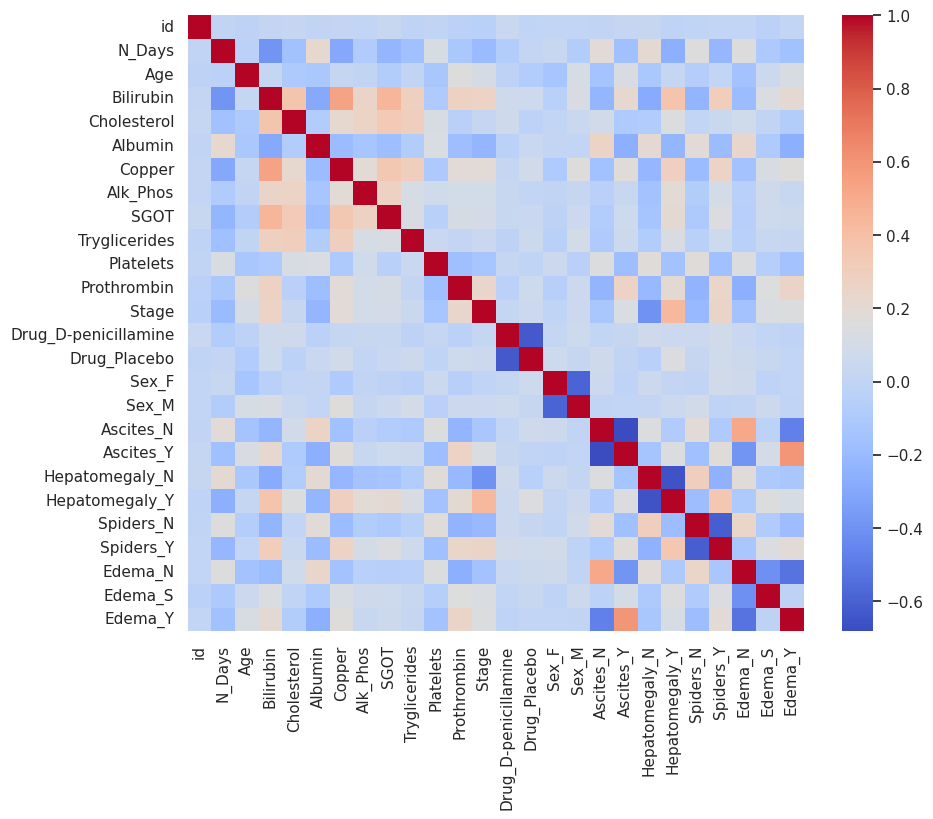

In [18]:
features = train_balanced_adasyn.drop('Status', axis=1)
corr_matrix = features.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', square=True)
plt.show()

    Delete independent variables with pearson correlation greater than 0.8.
    There are no highly correlated variables, fine.

In [19]:
high_corr_pairs = []

for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.6:
            high_corr_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j]))

for pair in high_corr_pairs:
    print(f"Pearson coefficient between feature' {pair[0]} 'and' {pair[1]} 'is: {pair[2]:.2f}")

Pearson coefficient between feature' Drug_Placebo 'and' Drug_D-penicillamine 'is: -0.63
Pearson coefficient between feature' Ascites_Y 'and' Ascites_N 'is: -0.68
Pearson coefficient between feature' Hepatomegaly_Y 'and' Hepatomegaly_N 'is: -0.65
Pearson coefficient between feature' Spiders_Y 'and' Spiders_N 'is: -0.62


    Feature selection using Recursive Feature Elimination (RFE) based on Random Forest model

In [20]:
# from sklearn.feature_selection import RFE
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import train_test_split
# from sklearn.feature_selection import SelectFromModel

# # train_imputed_balanced DataFrame，'Status'
# X_sampled = train_balanced_adasyn.drop('Status', axis=1)
# y_sampled = train_balanced_adasyn['Status']

# # split X, y for the next fitting process
# X_train_sampled, X_test_sampled, y_train_sampled, y_test_sampled = train_test_split(X_sampled, y_sampled, test_size=0.2, random_state=42)

# # initialise Random Forest model
# base_model = RandomForestClassifier(n_estimators=100, random_state=42)

# # RFE model
# '''
#     Important: Adjust the number of returned features here.
# '''
# rfe = RFE(estimator=base_model, n_features_to_select=10)  

# rfe.fit(X_train_sampled, y_train_sampled)

# # check features from rfe
# selected_features = X_train_sampled.columns[rfe.support_]

# print("The finally selected features are：", selected_features)

The finally selected features are： Index(['id', 'N_Days', 'Age', 'Bilirubin', 'Copper', 'Alk_Phos', 'SGOT',
       'Platelets', 'Prothrombin', 'Stage'],
      dtype='object')


In [8]:
raw_data = pd.read_csv("Semester2/ID5059/Coursework2/ID5059/data/train.csv")

## Creating the pipeline

In [9]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [10]:
numerical_features = ["N_Days", "Age", "Bilirubin", "Cholesterol", "Albumin", "Copper", "Alk_Phos", "SGOT", "Tryglicerides", "Platelets", "Prothrombin", "Stage"]
categorical_features = ["Drug", "Sex", "Ascites", "Hepatomegaly", "Spiders", "Edema"]


Create a pipeline that cleans the data, applies feature engineering and encodes the features

In [11]:
def transform_data(X):
    return X

def clean_and_prep(data):
    data = data.drop(columns=["id"])
    data = transform_data(data)
    return data

full_pipeline = ColumnTransformer([
    ("numerical", StandardScaler(), numerical_features),
    ("categorical", OneHotEncoder(sparse_output=False), categorical_features)
])

full_pipeline.set_output(transform="pandas")

numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(sparse_output = False)






Prepare the original data

In [16]:
y_train_original = raw_data["Status"]
X_original = raw_data.drop(columns=["Status"])
cleaned_data = clean_and_prep(X_original)
X_train_original = full_pipeline.fit_transform(cleaned_data)


Prepare the smote sampled dataset

Prepare the adasyn sampled dataset

In [18]:

X_train_adasyn, y_train_adasyn = balance_adasyn(X_train_original, y_train_original)


Prepare the imputed dataset

In [19]:
# y_train_imputed = train_imputed_mean["Status"]
# X_imputed = train_imputed_mean.drop(columns=["Status"])
# cleaned_data = clean_and_prep(X_imputed)
# X_train_imputed = full_pipeline.fit_transform(cleaned_data)

# Modelling

### Create a model to compare different data sets

| Dataset | Explanation | 
|----------|----------|
|  X_train_original, y_train_original      |  original dataset |
|  X_train_sampled, y_train_sampled      |  ADASYN balanced dataset |
| X_train_imputed, y_train_imputed    | imputed dataset


create model that compares the different result

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, roc_curve, mean_squared_error, roc_auc_score
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score, GridSearchCV

Fit the model with the different data sets

In [21]:
randomForest = RandomForestClassifier(random_state=42, criterion="log_loss")
randomForest_original = randomForest.fit(X_train_original, y_train_original)
randomForest_smote = randomForest.fit(X_train_smote, y_train_smote)
randomForest_adasyn = randomForest.fit(X_train_adasyn, y_train_adasyn)


Cross validation

In [81]:
randomForest_original_pred = cross_val_predict(randomForest_original, X_train_original, y_train_original, cv=3 )
randomForest_smote_pred = cross_val_predict(randomForest_smote, X_train_smote, y_train_smote, cv = 3 )
randomForest_adasyn_pred = cross_val_predict(randomForest_adasyn, X_train_adasyn, y_train_adasyn, cv=3 )

create the confusion matrixes for the different results

In [82]:
def plotConfusionMatrix(y_train, prediction, title):
    
    cm_rf = confusion_matrix(y_train, prediction)


    %matplotlib inline
    
    plt.figure(figsize=(10,7))
    sns.heatmap(cm_rf, annot=True, fmt="g")
    #plt.title(f'Confusion Matrix for {title}')
    plt.xlabel("Predicted")
    plt.ylabel("True Value")

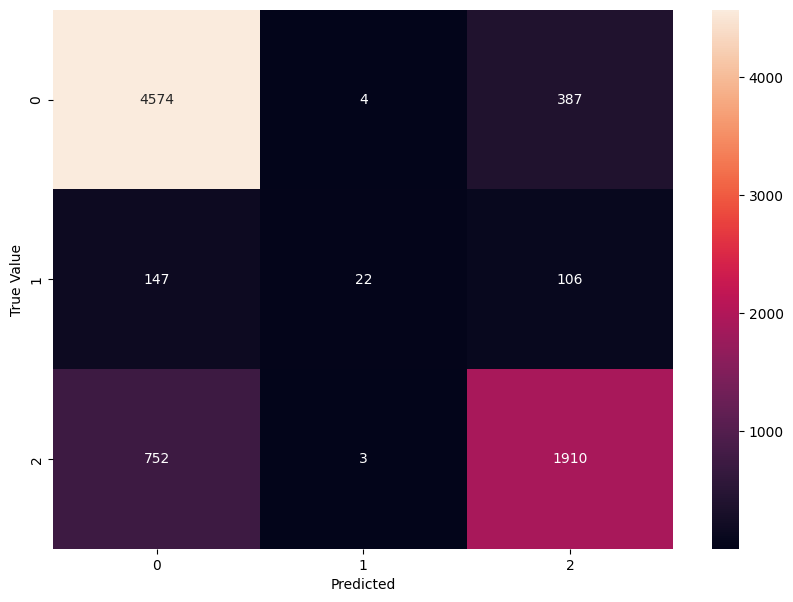

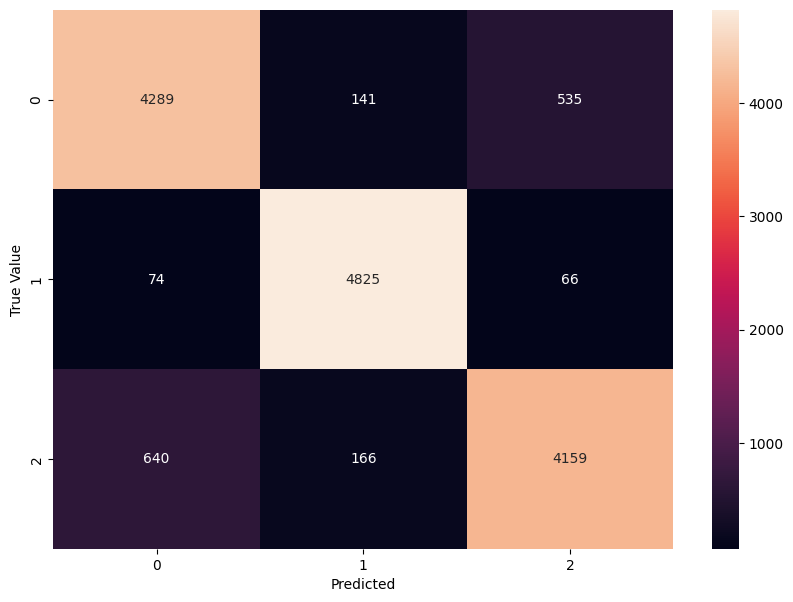

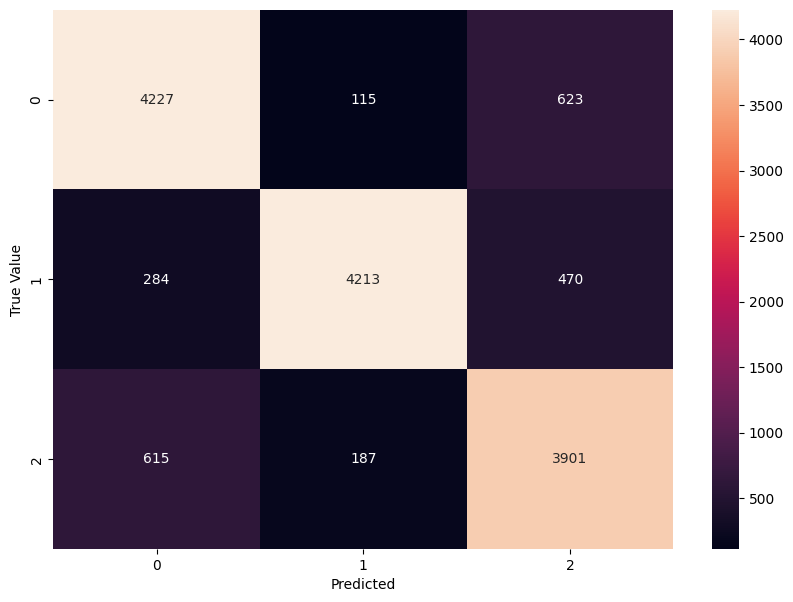

In [83]:
plotConfusionMatrix(y_train_original, randomForest_original_pred, "Original Dataset")
plotConfusionMatrix(y_train_smote, randomForest_smote_pred, "Dataset balanced with SMOTE")
plotConfusionMatrix(y_train_adasyn, randomForest_adasyn_pred, "Dataset balanced with adasyn")

## Plot the roc-curve for the different models

### Binarize the labels

In [61]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import RocCurveDisplay


In [84]:
randomForest_original_pred = cross_val_predict(randomForest_original, X_train_original, y_train_original, cv=3, method="predict_proba" )
randomForest_smote_pred = cross_val_predict(randomForest_smote, X_train_smote, y_train_smote, cv = 3, method="predict_proba" )
randomForest_adasyn_pred = cross_val_predict(randomForest_adasyn, X_train_adasyn, y_train_adasyn, cv=3, method="predict_proba")

In [85]:
label_binarizer = LabelBinarizer().fit(y_train_original)
y_onehot_test = label_binarizer.transform(y_train_original)

In [94]:
class_target = "CL"
class_id = np.flatnonzero(label_binarizer.classes_ == class_target)[0]
class_id

1

In [95]:
print(f"randomForest: {randomForest_original_pred.shape}")
print(f"onehot_test: {y_onehot_test.shape}")
print(class_id)

randomForest: (7905, 3)
onehot_test: (7905, 3)
1


In [96]:
randomForest_original_pred

array([[0.19, 0.12, 0.69],
       [0.75, 0.  , 0.25],
       [0.  , 0.  , 1.  ],
       ...,
       [0.25, 0.02, 0.73],
       [0.64, 0.  , 0.36],
       [0.98, 0.  , 0.02]])

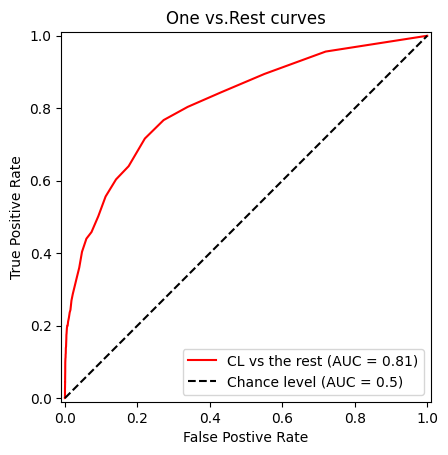

In [97]:
display = RocCurveDisplay.from_predictions(
    y_onehot_test[:, class_id],
    randomForest_original_pred[:, class_id],
    name=f"{class_target} vs the rest",
    color="red",
    plot_chance_level = True,
)
_= display.ax_.set(
    xlabel="False Postive Rate",
    ylabel="True Positive Rate",
    title = "One vs.Rest curves",
)



Calculate the AUC-Score for every dataset

### Create various models based on the best dataset

create confusion matrixes + description

plot the roc-curve for the models

calculate the auc-score for the models